# Social Preference Analysis

In [1]:
import tdt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
# Get the root directory (adjust according to your folder structure)
root_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))  # Go up one directory to P2_Code
# Add the root directory to sys.path
sys.path.append(root_dir)

from group_tdt_class import *
from experiment_functions import *
from social_pref.social_pref_extension import *

In [2]:
#mpfc
# experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Social_Pref\mpfc"
# csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Social_Pref\mpfc_csvs"
# brain_region = '#FFAF00'

# nac
experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Social_Pref\All\high_long_term\nac"
csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Social_Pref\nac_csvs"
brain_region = '#15616F'

#Combined
# experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Social_Pref\nac"
# csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Social_Pref\All_csvs"
# brain_region = '#15616F'

cup_assignment_csv_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Social_Pref\Social_Pref_sheet.csv"


In [3]:
group_data = GroupTDTData(experiment_path, csv_base_path)
# Batch process the data, removing the specified time segments for subjects
# group_data.batch_process(time_segments_to_remove=None)

Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Social_Pref\All\high_long_term\nac\n1-240522-072114\Notes.txt
read from t=0s to t=794.67s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Social_Pref\All\high_long_term\nac\n2-240522-084131\Notes.txt
read from t=0s to t=789.95s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Social_Pref\All\high_long_term\nac\n4-240523-084829\Notes.txt
read from t=0s to t=790.88s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Social_Pref\All\high_long_term\nac\n5-240826-083822\Notes.txt
read from t=0s to t=793.05s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Social_Pref\All\high_long_term\nac\n7-240827-072608\Notes.txt
read from t=0s to t=795.64s


In [4]:
group_data.sp_processing(cup_assignment_csv_path)

Social Pref Processing n1-240522-072114...
Removed time segment from 179.2s to 188.2s.
Social Pref Processing n2-240522-084131...
Removed time segment from 179.733s to 188.733s.
Social Pref Processing n4-240523-084829...
Removed time segment from 179.933s to 188.933s.
Social Pref Processing n5-240826-083822...
Removed time segment from 181.2s to 190.2s.
Social Pref Processing n7-240827-072608...
Removed time segment from 182.6s to 191.6s.


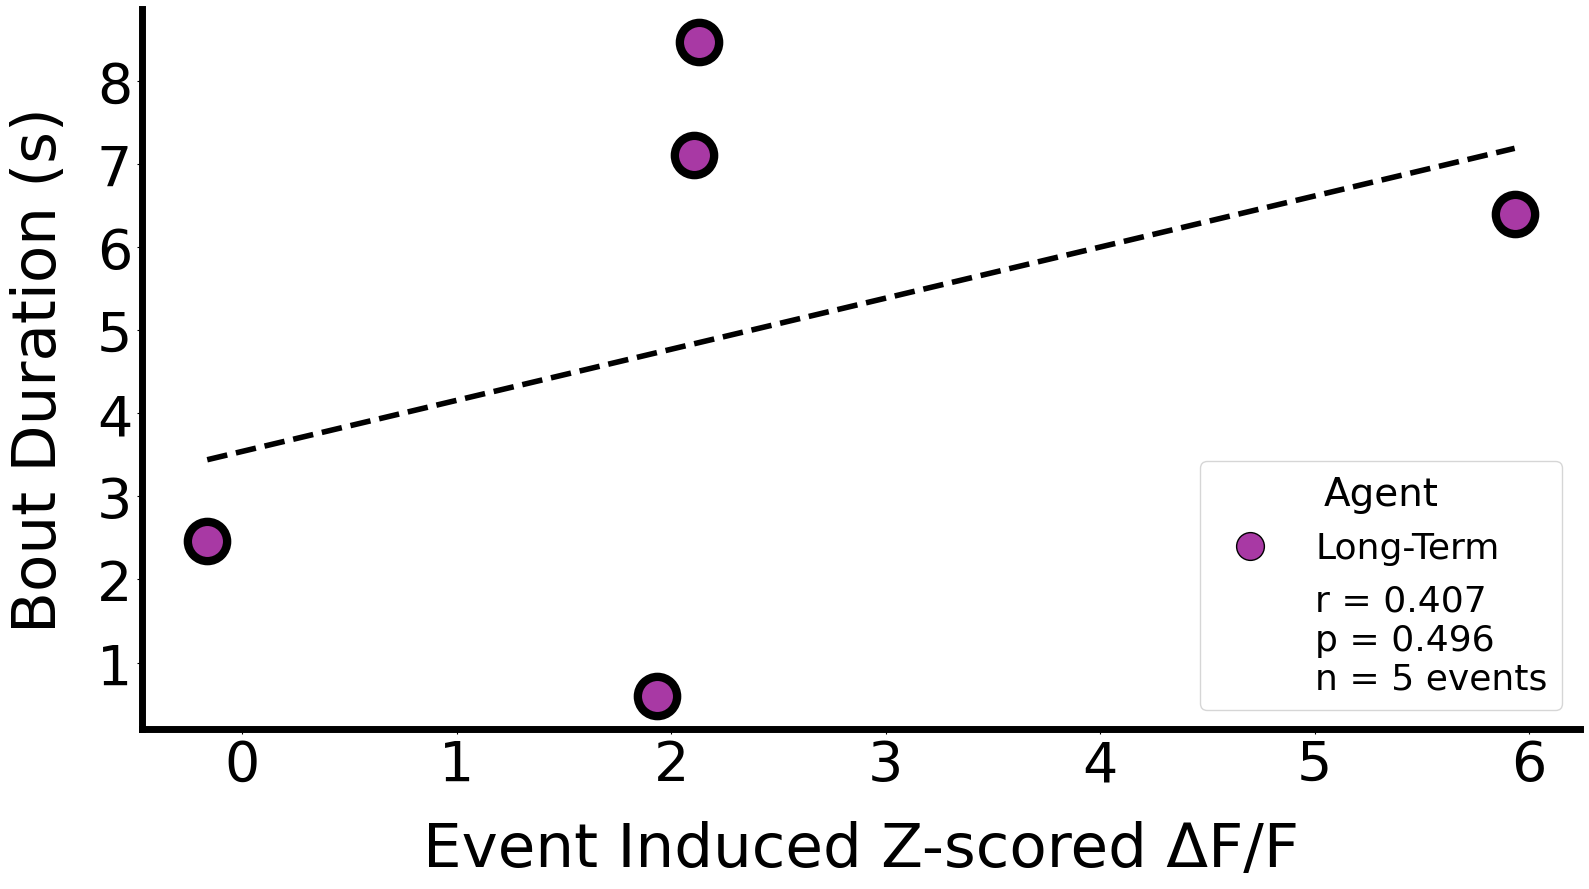

In [5]:
group_data.sp_plot_first_investigation_vs_zscore_4s(behavior_name='sniff',bouts=['long_term'], legend_loc = 'lower right' )

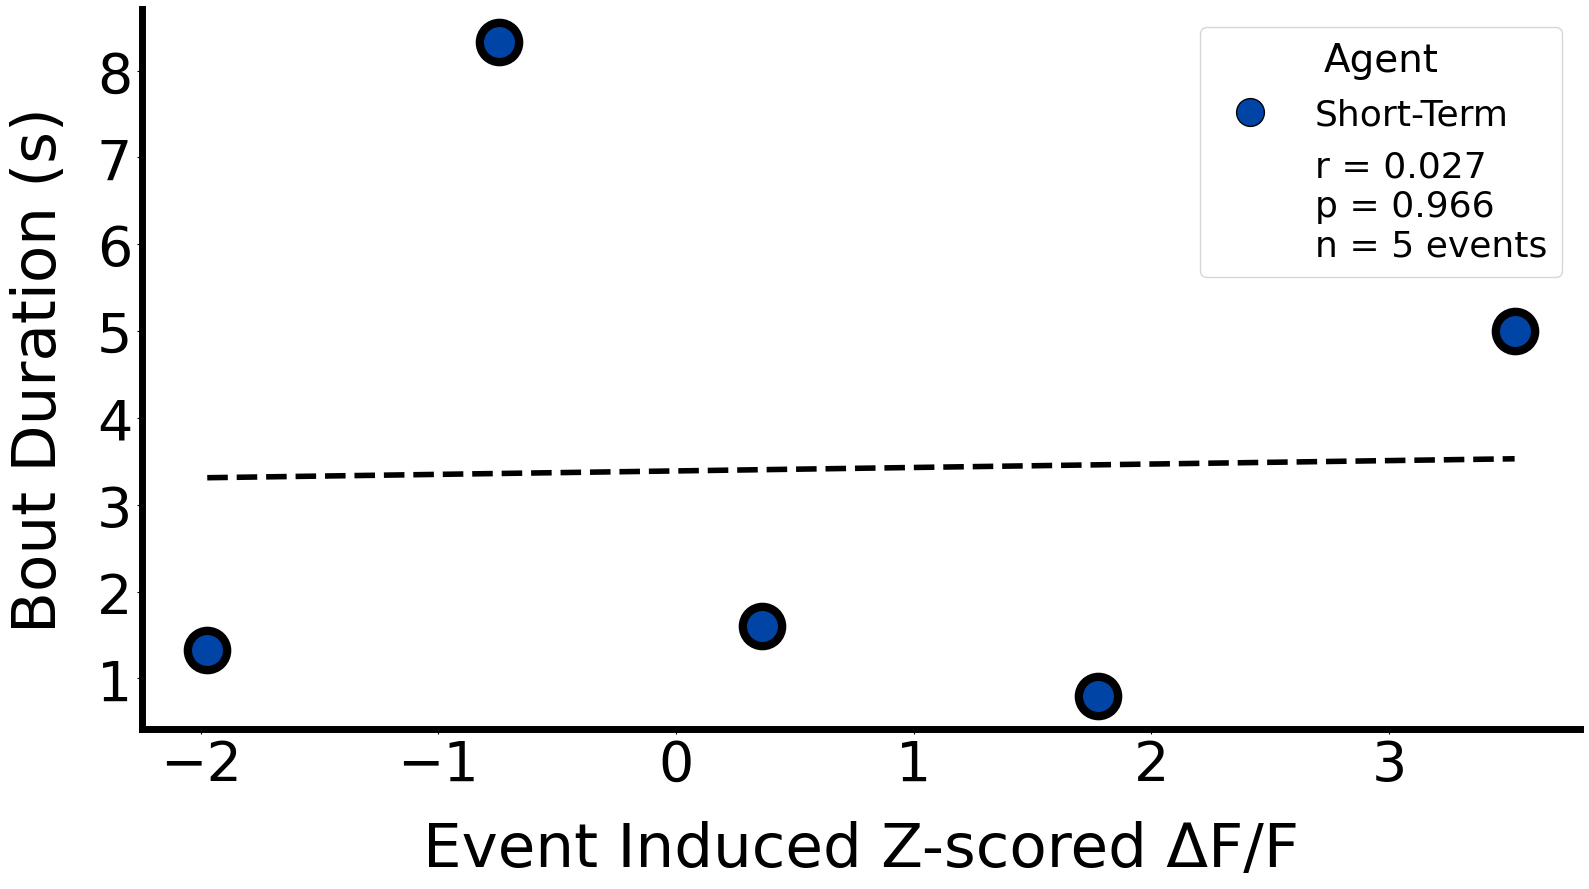

In [6]:
group_data.sp_plot_first_investigation_vs_zscore_4s(behavior_name='sniff',bouts=['short_term'], legend_loc = 'upper right')

Bout 'novel' not found in block 'n7-240827-072608'. Skipping.


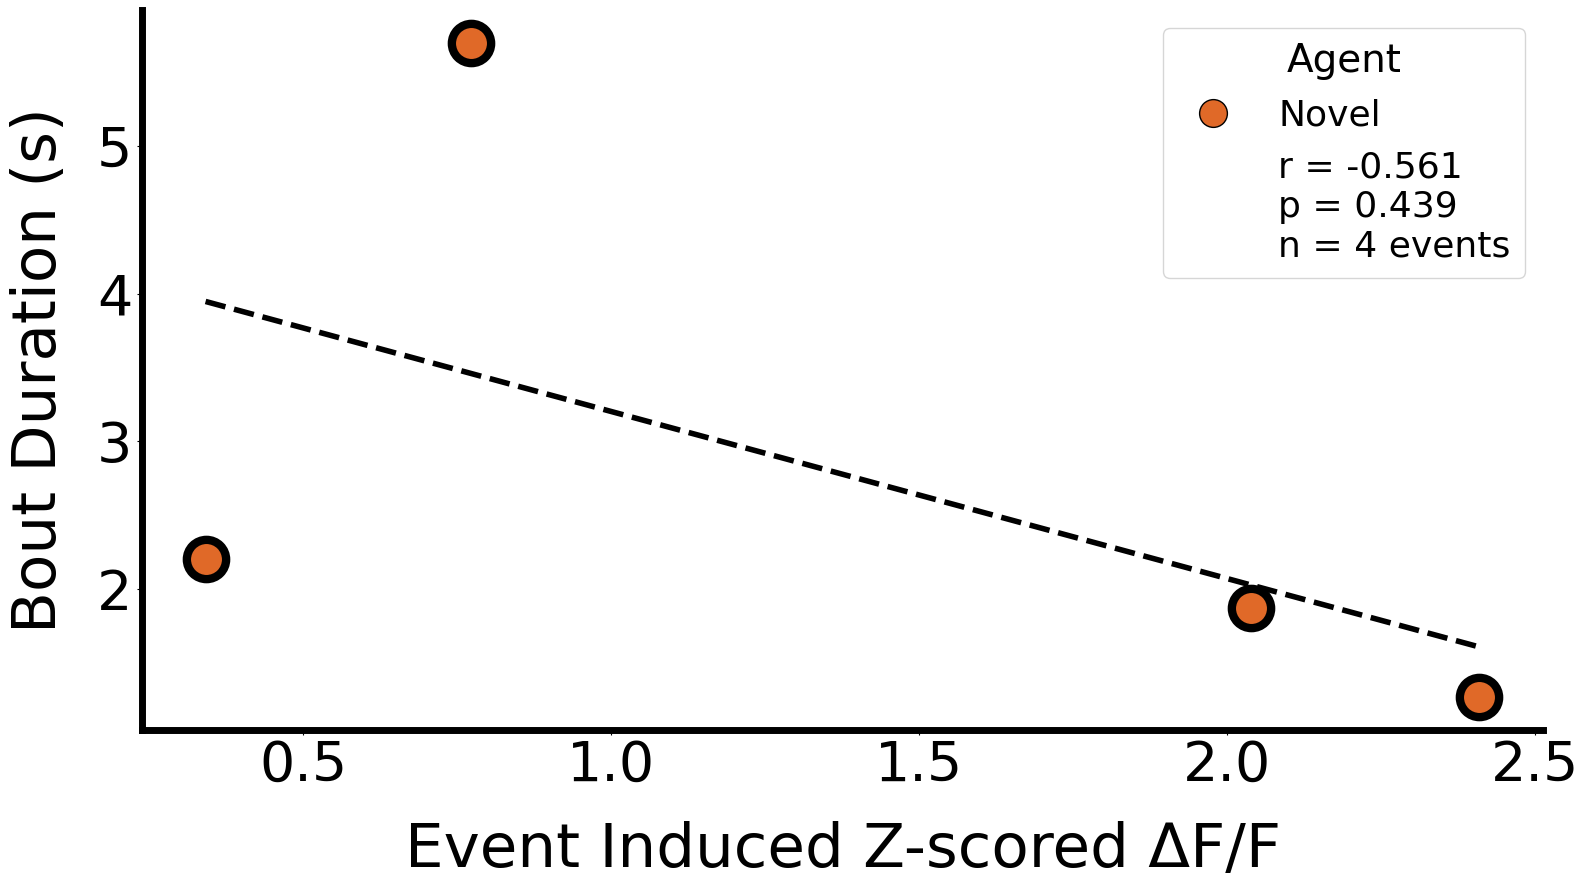

In [7]:
group_data.sp_plot_first_investigation_vs_zscore_4s(behavior_name='sniff',bouts=['novel'], legend_loc = 'upper right')

In [8]:
# group_data.sp_plot_first_investigation_vs_zscore_4s(behavior_name='sniff',bouts=['nothing'])

## Total duration

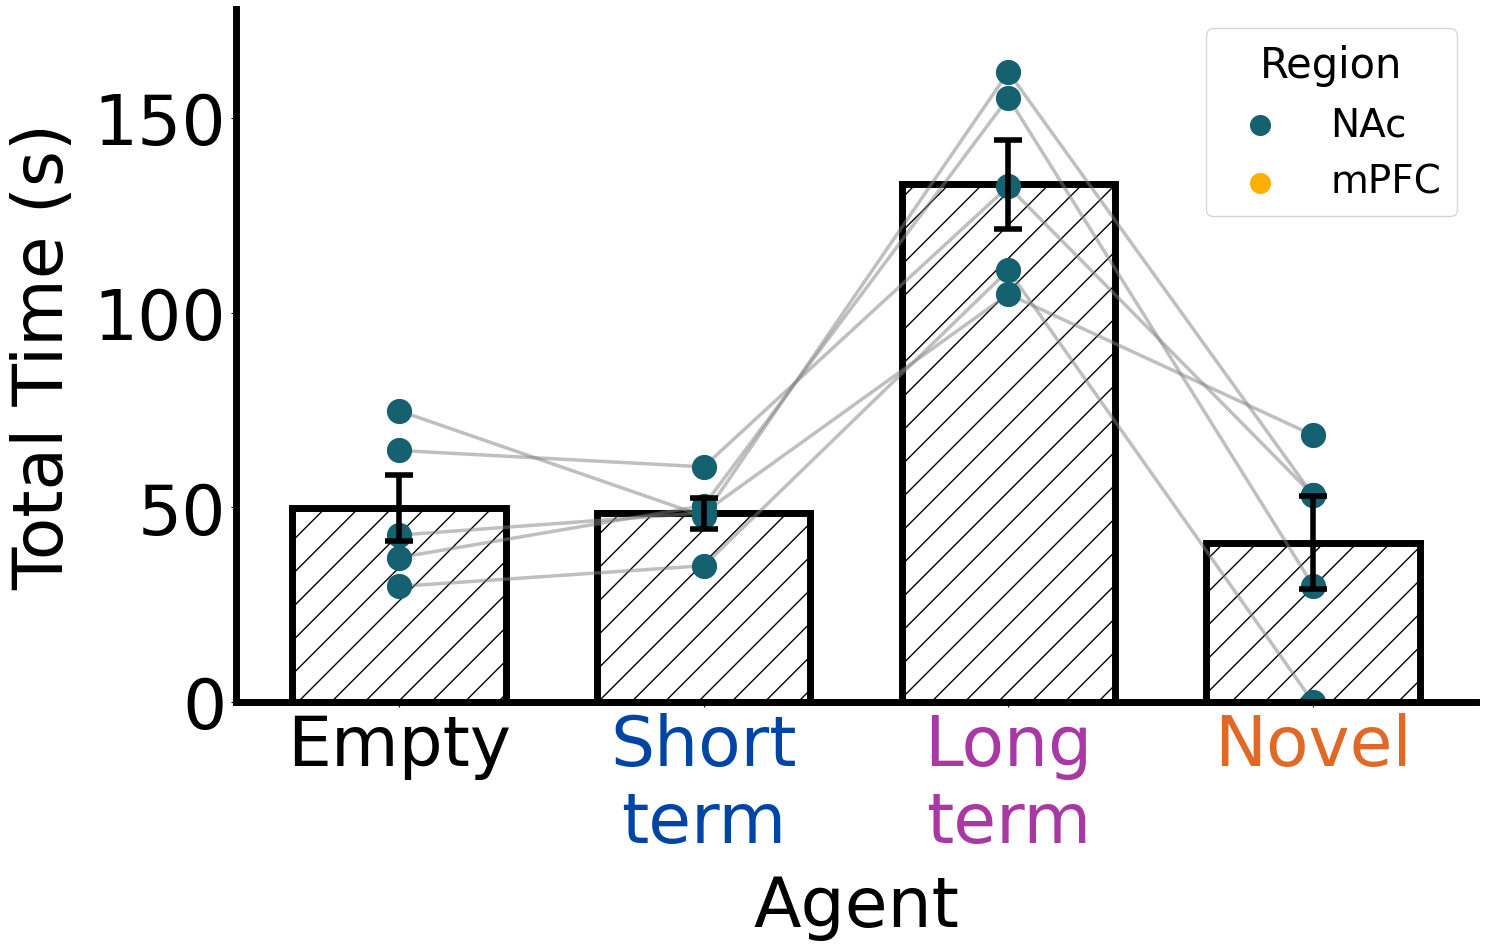

In [9]:
custom_xlabels = ['Empty', 'Short\nterm','Long\nterm', 'Novel']
# custom_xlabels=['Long\nterm']
colors = ['#000000','#0045A6','#A839A4','#E06928']
# colors = ['#A839A4']
avg_inv_tot_duration_df = sp_extract_total_behavior_time(group_data=group_data, behaviors = ['sniff'],bouts=['nothing','short_term','long_term','novel'])

plot_y_across_bouts_colors(avg_inv_tot_duration_df, '','Total Time (s)',bar_color='#FFFFFF',
                           custom_xtick_labels=custom_xlabels,figsize=(16,9),custom_xtick_colors=colors, legend=True
                           ,xlabel='Agent')

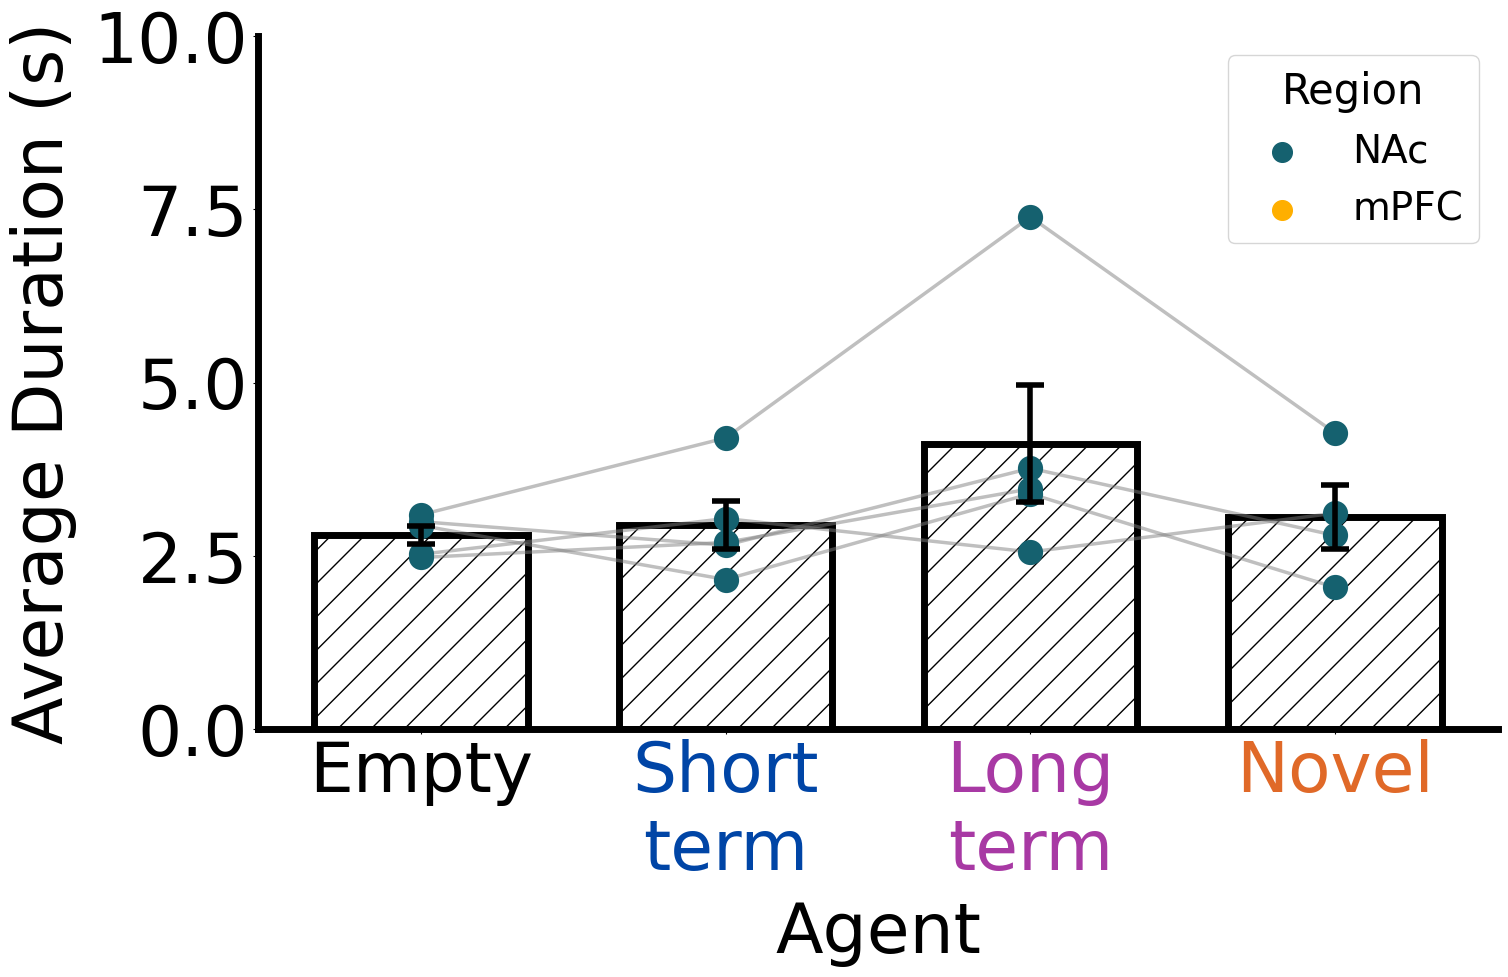

In [10]:
avg_inv_tot_duration_df = sp_extract_average_sniff_behavior_time(group_data=group_data, bouts=[ 'nothing','short_term','long_term','novel'])

plot_y_across_bouts_colors(avg_inv_tot_duration_df, '','Average Duration (s)',bar_color='#FFFFFF',
                           custom_xtick_labels=custom_xlabels,figsize=(16,9),custom_xtick_colors=colors, 
                           legend=True,ylim=(0,10),xlabel='Agent')

In [11]:
# # custom_xlabels = ['Novel','Long Term', 'Short Term', 'Empty']
# avg_inv_tot_duration_df = sp_extract_total_behavior_time(group_data=group_data, behaviors = ['chew'],bouts=[ 'nothing','short_term','long_term','novel'])

# plot_y_across_bouts_colors(avg_inv_tot_duration_df, 'Total Chew Time Across Agents','Investigation Time (s)',bar_color='#FFFFFF',custom_xtick_labels=custom_xlabels)

In [12]:
# import matplotlib.pyplot as plt

# # Extracting the "Long Term" data from the DataFrame
# long_term_data = avg_inv_tot_duration_df['long_term'].dropna()  # Drop any NaN values

# # Creating a histogram with 10-second bins
# plt.figure(figsize=(10, 6))
# plt.hist(long_term_data, bins=range(0, int(long_term_data.max()) + 10, 10), color='#FFFFFF', edgecolor='black')

# # Adding labels and title
# plt.xlabel('Investigation Time (s)', fontsize=16)
# plt.ylabel('Frequency', fontsize=16)
# plt.title('Histogram of Long Term Investigation Time', fontsize=18)

# # Customizing tick sizes
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)

# # Displaying the plot
# plt.tight_layout()
# plt.show()


# First Investigations

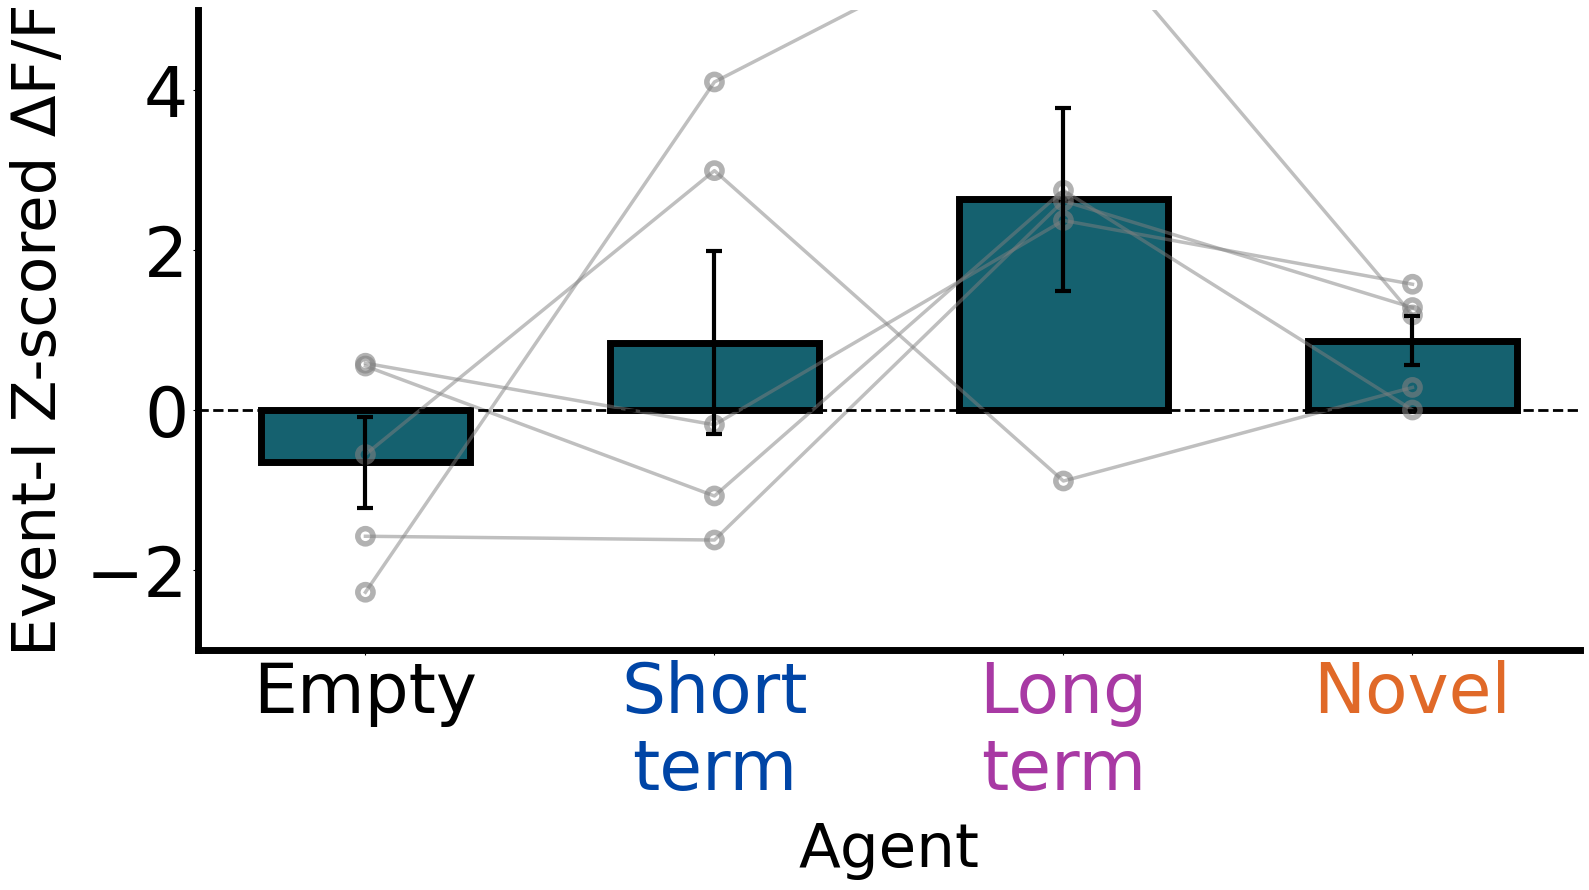

In [16]:
mean_df = sp_extract_nth_behavior_mean_da_corrected(group_data=group_data, behavior = 'sniff', n=1,max_duration=3.0)

desired_order = ['nothing', 'short_term', 'long_term', 'novel']
custom_xlabels = ['Empty', 'Short\nterm','Long\nterm', 'Novel']
colors = ['#000000','#0045A6','#A839A4','#E06928']
mean_df = mean_df[desired_order]
mean_df  = mean_df.fillna(0)


plot_y_across_bouts_gray(mean_df, '', 'Event-I Z-scored ΔF/F',bar_color=brain_region, 
                         custom_xtick_labels=custom_xlabels,figsize=(16,9), custom_xtick_colors= colors,ylim = (-3,5)
                         ,pad_inches=1)

In [14]:
import pandas as pd
from scipy.stats import ttest_rel
from itertools import combinations
from statsmodels.stats.multitest import multipletests

# Assuming avg_inv_tot_duration_df is your DataFrame
# Example structure:
# avg_inv_tot_duration_df = pd.DataFrame({
#     'Acq - ST': [value1, value2, ...],
#     'Short\nTerm': [value1, value2, ...],
#     'Long\nTerm': [value1, value2, ...],
#     'Novel': [value1, value2, ...]
# })

# Define the list of columns to compare
columns = mean_df.columns.tolist()

# Generate all unique pairs of columns for paired t-tests
pairs = list(combinations(columns, 2))

# Prepare a list to store the results
results = []

for pair in pairs:
    col1, col2 = pair
    # Drop any rows with NaN in either of the two columns to maintain pairing
    paired_data = mean_df[[col1, col2]].dropna()
    
    # Perform the paired t-test
    t_stat, p_val = ttest_rel(paired_data[col1], paired_data[col2])
    
    # Append the results to the list
    results.append({
        'Group 1': col1,
        'Group 2': col2,
        't-statistic': t_stat,
        'p-value': p_val
    })

# Create a DataFrame from the results
results_df = pd.DataFrame(results)
results_df

,Group 1,Group 2,t-statistic,p-value
0,nothing,short_term,-0.994864,0.376112
1,nothing,long_term,-2.176134,0.095155
2,nothing,novel,-2.087381,0.105141
3,short_term,long_term,-1.223127,0.288412
4,short_term,novel,-0.019328,0.985505
5,long_term,novel,1.682592,0.167744
